In [1]:
!pip install tensorflow-gpu==2.0.0 -q

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 3.8MB 59.5MB/s 
     |████████████████████████████████| 450kB 67.7MB/s 
ERROR: tensorflow 2.2.0rc1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input

from glob import glob

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2020-03-30 10:37:09--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  2.83MB/s    in 49s     

2020-03-30 10:37:58 (8.74 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [0]:
!unzip Food-5K.zip

In [11]:
!ls Food-5K/

evaluation  training  validation


In [0]:
!mkdir data

In [0]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/nonfood
!mkdir data/test/food
!mkdir data/test/nonfood

In [17]:
!ls data/train

food  nonfood


In [0]:
!mv Food-5K/training/0*.jpg data/train/nonfood
!mv Food-5K/training/1*.jpg data/train/food
!mv Food-5K/validation/0*.jpg data/test/nonfood
!mv Food-5K/validation/1*.jpg data/test/food


In [0]:
!ls data/train/nonfood

In [0]:
train_path = 'data/train'
valid_path = 'data/test'

In [0]:
Image_size = [200,200]

In [0]:
#getting the number of image files and validation files
image_files = glob(train_path + '/*/*.jpg')
valid_files = glob(valid_path + '/*/*.jpg')

In [36]:
len(image_files)

3000

In [24]:
#determining the number of classes in image file
folders = glob(train_path + '/*')
folders

['data/train/food', 'data/train/nonfood']

In [27]:
#creating an instance of the pre-trained model
ptm  = PretrainedModel(
    input_shape = Image_size + [3],
    weights = 'imagenet',
    include_top = False
)

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
ptm.trainable = False

In [0]:
#Mapping the data into feature vectors
K = len(folders)
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

model = Model((ptm.input), x)

In [0]:
gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [0]:
batch_size = 128

In [32]:
#creating generators
train_gen = gen.flow_from_directory(
    train_path,
    batch_size = batch_size,
    shuffle = True,
    target_size = Image_size
)

Found 3000 images belonging to 2 classes.


In [33]:
valid_gen = gen.flow_from_directory(
    valid_path,
    batch_size = batch_size,
    target_size = Image_size
)

Found 1000 images belonging to 2 classes.


In [0]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [37]:
r = model.fit(
    train_gen,
    validation_data = (valid_gen),
    epochs = 10,
    steps_per_epoch = int(np.ceil(len(image_files)/ batch_size)),
    validation_steps = int(np.ceil(len(valid_files)/ batch_size))
)

Train for 24 steps, validate for 8 steps
Epoch 1/10
24/24 [==============================] - 67s 3s/step - loss: 2.4078 - accuracy: 0.9157 - val_loss: 0.4679 - val_accuracy: 0.9830
Epoch 2/10
24/24 [==============================] - 39s 2s/step - loss: 0.2248 - accuracy: 0.9890 - val_loss: 0.6305 - val_accuracy: 0.9790
Epoch 3/10
24/24 [==============================] - 39s 2s/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.5135 - val_accuracy: 0.9810
Epoch 4/10
24/24 [==============================] - 39s 2s/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.4377 - val_accuracy: 0.9820
Epoch 5/10
24/24 [==============================] - 38s 2s/step - loss: 2.9273e-07 - accuracy: 1.0000 - val_loss: 0.4448 - val_accuracy: 0.9820
Epoch 6/10
24/24 [==============================] - 39s 2s/step - loss: 2.1919e-07 - accuracy: 1.0000 - val_loss: 0.4455 - val_accuracy: 0.9820
Epoch 7/10
24/24 [==============================] - 38s 2s/step - loss: 1.9276e-07 - accuracy: 1.0000 - val_los

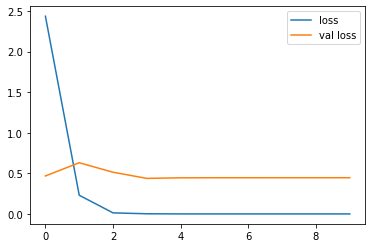

In [40]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()

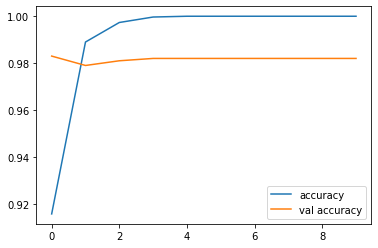

In [41]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()